# Ontario Outbreaks: Are Gyms a Significant Vector of Covid Transmission?

***

In [33]:
import pandas as pd
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://data.ontario.ca/datastore/dump/d5d8f478-765c-4246-b8a7-c3b13a4a1a41?bom=True')

In [3]:
df.head(3)

,_id,date,category_grouped,outbreak_subgroup,TOTAL_CASES
0,1,2020-03-06T00:00:00,2 Congregate Living,SHELTER,1
1,2,2020-03-08T00:00:00,1 Congregate Care,LONG-TERM CARE HOME,1
2,3,2020-03-09T00:00:00,4 Workplace,WORKPLACE - OTHER,1


In [4]:
df.groupby('outbreak_subgroup').sum().sort_values(by='TOTAL_CASES', ascending=False).drop('_id', axis=1, inplace=False)

,TOTAL_CASES
outbreak_subgroup,
LONG-TERM CARE HOME,29999
WORKPLACE - OTHER,21503
SCHOOL - ELEMENTARY,10486
RETIREMENT HOME,8387
HOSPITAL,7470
CHILD CARE,5296
GROUP HOME/SUPPORTIVE HOUSING,4472
OTHER RECREATION,4387
WORKPLACE - FOOD PROCESSING,4021


In [5]:
temp = round(1655/df.groupby('outbreak_subgroup').sum()['TOTAL_CASES'].sum()*100,1)
print(f'{temp}%')

1.4%


## So, in total, 'recreational fitness' outbreaks have accounted for *1.4%* of all outbreak cases in Ontario since the start of the pandemic.

### Something to keep in mind is that 'recreational fitness' includes:
- Gyms/fitness studios
- Sporting teams/leagues
- Other (athletic facilities, dance studios, recreational/community centres, golf courses, tennis courts, and indoor playgrounds)

### And according to a Public Health Ontario report covering outbreaks from Feb 16, 2020 to June 12, 2021:
- Gyms/fitness studios accounted for 27% of 'recreational fitness' outbreak-cases
- Sporting teams/leagues accounted for 30% of 'recreational fitness' outbreak-cases
- Other accounted for 43% of 'recreational fitness' outbreak-cases

### Of course, gyms were intermittently open during the surveyed period of time, but this is to say that not every outbreak-case counted as 'recreational fitness' happened in a gym. 

### This has implications for how we interpret the data: for example, the previously calculated 1.4% can be read as 'less than 1.4% of outbreak-cases have occurred in gyms/fitness studios'.

### Also worth noting from that Public Health Ontario report is that, of all observed gym/fitness outbreak cases:
- 0 required hospitalization
- 0 resulted in death

Source: https://www.publichealthontario.ca/-/media/documents/ncov/epi/covid-19-settings-based-outbreaks-epi-summary.pdf?sc_lang=en

***

## Gyms in Ontario have been shut down for a lot of the time during the pandemic. So I've broken down four periods of time in which gyms have been open across the province.

I'd like to examine periods in which gyms were open across the province in order to get a better idea of their relative risk for outbreaks compared to other settings such as bars/restaurants or other types of recreation.

*Do gyms really account for a large % of outbreak cases? Is the risk, as Bonnie Henry says, 'just higher' in gyms?*

# Period 0: March 1st, 2020 to March 17th, 2020:

https://toronto.ctvnews.ca/ontario-declares-state-of-emergency-amid-covid-19-pandemic-1.4856033

In [6]:
df1 = df[(df['date'] > '2020-03-01') & (df['date'] <= '2020-03-17')]
df1.groupby('outbreak_subgroup').sum().sort_values(by='TOTAL_CASES', ascending=False).drop('_id', axis=1, inplace=False)

,TOTAL_CASES
outbreak_subgroup,
WORKPLACE - OTHER,3
LONG-TERM CARE HOME,2
GROUP HOME/SUPPORTIVE HOUSING,1
SHELTER,1


This doesn't really tell us anything. Let's move on to the next period in which gyms were open:

# Period 1: July 16th, 2020 to October 10th, 2020:


https://news.ontario.ca/en/release/1000501/ontario-moving-to-step-three-of-roadmap-to-reopen-on-july-16 

https://toronto.ctvnews.ca/ontario-shutting-down-indoor-dining-gyms-and-movie-theatres-in-three-covid-19-hotspots-1.5139458


### Gyms in Ottawa, Toronto, and Peel Region shut down on October 10th.
- These areas account for 38% of Ontario's population and 50% of Ontario's Covid cases throughout the pandemic.
- Gyms in these areas were shut down because they were considered Ontario's 'hotspots' for Covid.

Source: https://covid-19.ontario.ca/data/case-numbers-and-spread 

#### Extending the analysis into a period of time in which non-hotspot area gyms were open, but hotspot area gyms were closed would bias the analysis in the direction of showing that gym outbreaks do not account for a large % of all outbreak cases.

#### That is, I'm framing this analysis such that I am attempting to steelman the argument that 'gyms are huge vectors for Covid transmission'.

#### Even in doing so, we still find that gyms do not represent a huge source of outbreak cases:

In [7]:
df2 = df[(df['date'] >= '2020-07-16') & (df['date'] <= '2020-10-09')]
df2.groupby('outbreak_subgroup').sum().sort_values(by='TOTAL_CASES', ascending=False).drop('_id', axis=1, inplace=False)

,TOTAL_CASES
outbreak_subgroup,
LONG-TERM CARE HOME,631
WORKPLACE - OTHER,472
RETIREMENT HOME,255
BAR/RESTAURANT/NIGHTCLUB,230
WORKPLACE - FARM,195
OTHER RECREATION,178
CHILD CARE,147
SCHOOL - ELEMENTARY,146
HOSPITAL,135


In [8]:
#Recreational Fitness

temp = round(112/df2.groupby('outbreak_subgroup').sum()['TOTAL_CASES'].sum()*100,1)
print(f'{temp}%')

3.8%


In [9]:
#Bars/Restaurants/Nightclubs

temp = round(230/df2.groupby('outbreak_subgroup').sum()['TOTAL_CASES'].sum()*100,1)
print(f'{temp}%')

7.7%


In [10]:
#Other Recreation

temp = round(178/df2.groupby('outbreak_subgroup').sum()['TOTAL_CASES'].sum()*100,1)
print(f'{temp}%')

6.0%


### So during the first period of gyms being open in Ontario during the pandemic:
- 'recreational fitness' which includes gyms as well as other things such as sports leagues, accounted for 4.7% of outbreak cases
- bars/restaurants/nightclubs accounted for 7.7% of outbreak cases
- and 'other recreation' accounted for 6%. 
 - Other recreation includes: weddings, funerals, private gatherings, theatres, banquet halls, race tracks and other community gatherings*

# Period 2: July 19th, 2021 to September 22nd, 2021:

https://www.blogto.com/sports_play/2021/06/when-gyms-opening-in-ontario/
https://toronto.ctvnews.ca/ontario-gyms-are-finally-reopening-here-s-what-to-expect-on-your-next-visit-1.5509058 

#### On November 7th, 2020 Peel Region and Ottawa gyms reopened, but Toronto did not. Ontario then went into a province wide lockdown banning gyms throughout the province on December 26th, 2020. Some areas reopened gyms earlier than others in the coming months. 

#### Again, it's important to look at times in which gyms were open across the province. Otherwise the analysis is biased because it'll be skewed by gyms being open in anti-hotspot areas and closed in hotspot areas. 

#### Gyms finally reopened province wide on July 16th, but City of Toronto pushed back their reopening date to July 19th. Vax Pass came into force on Sept. 22.

In [11]:
df3 = df[(df['date'] >= '2021-07-16') & (df['date'] < '2021-09-22')]
df3.groupby('outbreak_subgroup').sum().sort_values(by='TOTAL_CASES', ascending=False).drop('_id', axis=1, inplace=False)

,TOTAL_CASES
outbreak_subgroup,
OTHER RECREATION,614
WORKPLACE - OTHER,469
BAR/RESTAURANT/NIGHTCLUB,438
CHILD CARE,420
SCHOOL - ELEMENTARY,302
LONG-TERM CARE HOME,231
RETIREMENT HOME,116
CAMP - DAY,104
RECREATIONAL FITNESS,101


In [12]:
#Recreational Fitness

temp = round(101/df3.groupby('outbreak_subgroup').sum()['TOTAL_CASES'].sum()*100,1)
print(f'{temp}%')

3.0%


In [13]:
#Bars/Restaurants/Nightclubs

temp = round(438/df3.groupby('outbreak_subgroup').sum()['TOTAL_CASES'].sum()*100,1)
print(f'{temp}%')

12.8%


In [14]:
#Other Recreation

temp = round(614/df3.groupby('outbreak_subgroup').sum()['TOTAL_CASES'].sum()*100,1)
print(f'{temp}%')

18.0%


### So during the 2nd period of gyms being open in Ontario during the pandemic:
- 'recreational fitness' accounted for 3% of outbreak cases
- bars/restaurants/nightclubs accounted for 12.8% of outbreak cases
- 'other recreation' accounted for 20.6%. 

# Period 3: September 22, 2021 to November 28th, 2021:

### From the start of vax pass until the arrival of Omicron in Ontario

#### Basing this arrival date on this report from Public Health Ontario:
- https://www.publichealthontario.ca/-/media/documents/ncov/epi/covid-19-early-dynamics-omicron-ontario-epi-summary.pdf?sc_lang=en 

In [15]:
df4 = df[(df['date'] >= '2021-09-22') & (df['date'] <= '2021-11-28')]
df4.groupby('outbreak_subgroup').sum().sort_values(by='TOTAL_CASES', ascending=False).drop('_id', axis=1, inplace=False)

,TOTAL_CASES
outbreak_subgroup,
SCHOOL - ELEMENTARY,2824
WORKPLACE - OTHER,744
OTHER RECREATION,482
RETIREMENT HOME,307
CHILD CARE,271
UNKNOWN,222
SCHOOL - SECONDARY,222
BAR/RESTAURANT/NIGHTCLUB,213
RECREATIONAL FITNESS,209


In [16]:
#Recreational Fitness

temp = round(209/df4.groupby('outbreak_subgroup').sum()['TOTAL_CASES'].sum()*100,1)
print(f'{temp}%')

3.1%


In [17]:
#Bars/Restaurants/Nightclubs

temp = round(213/df4.groupby('outbreak_subgroup').sum()['TOTAL_CASES'].sum()*100,1)
print(f'{temp}%')

3.1%


In [18]:
#Other Recreation

temp = round(482/df4.groupby('outbreak_subgroup').sum()['TOTAL_CASES'].sum()*100,1)
print(f'{temp}%')

7.1%


### So during the 3rd period of gyms being open in Ontario during the pandemic:
- 'recreational fitness' accounted for 3.1% of outbreak cases
- bars/restaurants/nightclubs accounted for 3.1% of outbreak cases
- 'other recreation' accounted for 7.1%. 

# Period 4: November 29th, 2021 to January 4th, 2022:

### After arrival of Omicron in Ontario up until the most recent closure

In [19]:
df5 = df[(df['date'] >= '2021-11-29') & (df['date'] <= '2022-01-04')]
df5.groupby('outbreak_subgroup').sum().sort_values(by='TOTAL_CASES', ascending=False).drop('_id', axis=1, inplace=False)

,TOTAL_CASES
outbreak_subgroup,
SCHOOL - ELEMENTARY,2814
LONG-TERM CARE HOME,2329
HOSPITAL,695
SCHOOL - SECONDARY,642
RECREATIONAL FITNESS,617
WORKPLACE - OTHER,599
GROUP HOME/SUPPORTIVE HOUSING,581
RETIREMENT HOME,509
CHILD CARE,429


In [20]:
#Recreational Fitness

temp = round(617/df5.groupby('outbreak_subgroup').sum()['TOTAL_CASES'].sum()*100,1)
print(f'{temp}%')

5.4%


In [21]:
#Bars/Restaurants/Nightclubs

temp = round(326/df5.groupby('outbreak_subgroup').sum()['TOTAL_CASES'].sum()*100,1)
print(f'{temp}%')

2.8%


In [22]:
#Other Recreation

temp = round(372/df5.groupby('outbreak_subgroup').sum()['TOTAL_CASES'].sum()*100,1)
print(f'{temp}%')

3.2%


### So during the 4th period of gyms being open in Ontario during the pandemic:
- 'recreational fitness' accounted for 5.4% of outbreak cases
- bars/restaurants/nightclubs accounted for 2.8% of outbreak cases
- 'other recreation' accounted for 3.2%. 

This is the only time that recreational fitness gets close to the top of the list of sources of outbreak cases in periods of time in which gyms were in open in Ontario during the pandemic.

Recreational fitness certainly did not seem to be a vector of transmission prior to Omicron, but now the argument makes more sense.

Although I would also note that Public Health Ontario, as well as other jurisdictions are reporting vastly lower rates of hospitalizations and ICU admissions from Omicron compared to Delta.

Public Health Ontario, in a matched cohort study found that Omicron infection was 4x less likely to kill someone, 7x less likely to send them to ICU, and 3x less likely to be hospitalized when compared to Delta.

https://www.publichealthontario.ca/-/media/documents/ncov/epi/covid-19-epi-enhanced-estimates-omicron-severity-study.pdf?sc_lang=en


***

# A note on vax passes and recreational fitness outbreaks.

## Worth noting that total recreational fitness outbreak cases in;

- Period 1 was 112 cases over 86 days, averaging 1.3 cases a day;

- Period 2 was 101 cases over 65 eays, averaging 1.5 cases a day;

- in Period 3, after the introduction of vax pass and prior to Omicron, there were 209 cases over 68 days, averaging 3.1 cases a day;

- in Period 4, after the introduction of vax pass, and after the arrival of Omicron, there were 617 cases over 37 days, averaging 16.7 cases a day.

## What did vax passes do to reduce cases in recreational fitness settings? 

It would *appear* that cases in recreational fitness settings increased after the introduction of vax passes and prior to the arrival of Omicron.

After introduction of vax pass, and prior to arrival of Omicron, the rate of outbreak cases from recreational fitness settings doubled compared to prior periods of time when all gyms were open but there was no vax pass. How does one explain that? Well...

## Is the increased rate of cases in recreational fitness settings after the implementation of vax passes a result of seasonality?

We can check this by comparing overlapping periods of time from previous years in which gyms were open province wide.

Unfortunately, this only gives a small snippet to compare: 
September 22nd, 2020 to October 9th, 2020 compared to September 22nd, 2021 to October 9th, 2021.

In [23]:
df6 = df[(df['date'] >= '2020-09-22') & (df['date'] <= '2020-10-09')]
df6.groupby('outbreak_subgroup').sum().sort_values(by='TOTAL_CASES', ascending=False).drop('_id', axis=1, inplace=False)

,TOTAL_CASES
outbreak_subgroup,
LONG-TERM CARE HOME,363
WORKPLACE - OTHER,156
RETIREMENT HOME,149
SCHOOL - ELEMENTARY,127
HOSPITAL,116
BAR/RESTAURANT/NIGHTCLUB,93
RECREATIONAL FITNESS,75
CHILD CARE,71
GROUP HOME/SUPPORTIVE HOUSING,60


In [24]:
df7 = df[(df['date'] >= '2021-09-22') & (df['date'] <= '2021-10-09')]
df7.groupby('outbreak_subgroup').sum().sort_values(by='TOTAL_CASES', ascending=False).drop('_id', axis=1, inplace=False)

,TOTAL_CASES
outbreak_subgroup,
SCHOOL - ELEMENTARY,604
WORKPLACE - OTHER,172
OTHER RECREATION,152
CHILD CARE,95
LONG-TERM CARE HOME,86
SCHOOL - SECONDARY,69
BAR/RESTAURANT/NIGHTCLUB,45
CORRECTIONAL FACILITY,38
GROUP HOME/SUPPORTIVE HOUSING,34


Comparing these two tables, it would appear that yes, seasonality is the factor driving an increased rate of Covid cases - not the implementation of vax pass. 

Let's get a better look by constructing a Kaplan-Meier plot.

In [25]:
pre_vax_pass = df6.drop('_id', axis=1, inplace=False).drop(df6[df6.outbreak_subgroup != 'RECREATIONAL FITNESS'].index, inplace=False).drop('category_grouped', axis=1, inplace=False).reset_index(drop=True)
post_vax_pass = df7.drop('_id', axis=1, inplace=False).drop(df7[df7.outbreak_subgroup != 'RECREATIONAL FITNESS'].index, inplace=False).drop('category_grouped', axis=1, inplace=False).reset_index(drop=True)

In [26]:
pre_vax_pass = pre_vax_pass.assign(group=[1 for x in range(0,16)])
pre_vax_pass = pre_vax_pass.assign(time=[0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16])
pre_vax_pass = pre_vax_pass.drop('outbreak_subgroup', axis=1, inplace=False).drop('date', axis=1, inplace=False)

In [27]:
post_vax_pass = post_vax_pass.assign(group=[2 for x in range(0,11)])
post_vax_pass = post_vax_pass.assign(time=[0,1,2,3,6,7,8,13,14,15,16])
post_vax_pass = post_vax_pass.drop('outbreak_subgroup', axis=1, inplace=False).drop('date', axis=1, inplace=False)

In [51]:
for_kap_m = pre_vax_pass.append(post_vax_pass)
for_kap_m = for_kap_m.reset_index(drop=True)

,TOTAL_CASES,group,time
0,2,1,0
1,6,1,1
2,2,1,2
3,3,1,3
4,5,1,4
5,1,1,5
6,2,1,6
7,2,1,7
8,2,1,8
9,2,1,9


In [131]:
new_df = pd.DataFrame()
new_df = new_df.assign(duration=[]).assign(infected=[]).assign(group=[])

In [132]:
for i in range(0,10):
    a = for_kap_m[(for_kap_m['group'] == 1) & (for_kap_m['time'] == i)]['TOTAL_CASES'].values[0]
    b = [1 for x in range(a)]
    c = [i for x in range(a)]
    d = ['Pre Vax Pass' for x in range(a)]
    df_x = pd.DataFrame(list(zip(c,b,d)),columns=['duration','infected','group'])
    new_df = new_df.append(df_x)

for i in range(11,17):
    a = for_kap_m[(for_kap_m['group'] == 1) & (for_kap_m['time'] == i)]['TOTAL_CASES'].values[0]
    b = [1 for x in range(a)]
    c = [i for x in range(a)]
    d = ['Pre Vax Pass' for x in range(a)]
    df_x = pd.DataFrame(list(zip(c,b,d)),columns=['duration','infected','group'])
    new_df = new_df.append(df_x)
    
for i in range(0,4):
    a = for_kap_m[(for_kap_m['group'] == 2) & (for_kap_m['time'] == i)]['TOTAL_CASES'].values[0]
    b = [1 for x in range(a)]
    c = [i for x in range(a)]
    d = ['Post Vax Pass' for x in range(a)]
    df_x = pd.DataFrame(list(zip(c,b,d)),columns=['duration','infected','group'])
    new_df = new_df.append(df_x)
    
for i in range(6,9):
    a = for_kap_m[(for_kap_m['group'] == 2) & (for_kap_m['time'] == i)]['TOTAL_CASES'].values[0]
    b = [1 for x in range(a)]
    c = [i for x in range(a)]
    d = ['Post Vax Pass' for x in range(a)]
    df_x = pd.DataFrame(list(zip(c,b,d)),columns=['duration','infected','group'])
    new_df = new_df.append(df_x)
    
for i in range(13,17):
    a = for_kap_m[(for_kap_m['group'] == 2) & (for_kap_m['time'] == i)]['TOTAL_CASES'].values[0]
    b = [1 for x in range(a)]
    c = [i for x in range(a)]
    d = ['Post Vax Pass' for x in range(a)]
    df_x = pd.DataFrame(list(zip(c,b,d)),columns=['duration','infected','group'])
    new_df = new_df.append(df_x)

In [140]:
new_df

,duration,infected,group
0,0.0,1.0,Pre Vax Pass
1,0.0,1.0,Pre Vax Pass
0,1.0,1.0,Pre Vax Pass
1,1.0,1.0,Pre Vax Pass
2,1.0,1.0,Pre Vax Pass
...,...,...,...
2,15.0,1.0,Post Vax Pass
0,16.0,1.0,Post Vax Pass
1,16.0,1.0,Post Vax Pass
2,16.0,1.0,Post Vax Pass


Now, we also need to add in some people that go to the gym but DIDN'T get infected.

How many? Well one study found that only 30% of Canadian gym members had returned to their gym throughout the pandemic.

So if we take the number provided by the IHRSA, that in 2020 there were 6.18 million Canadians with gym memberships and assume that membership % are evenly distributed across every province, then we can assume that 2.45 million Ontarians had a gym membership in 2020, and that only 30% of them actually went to the gym in 2020. So that would make 735,000 gym-goers in Ontario in 2020. Other statistics suggest the average times gone per week is between 1 and 4 - likely people that go to the gym (the 30% of those with memberships) actually are going on a regular basis. 

In 2021, we have reason to believe that closer to 40% of members went to the gym, based on some of the studies referenced in the links below, so taking the figure of 16.67% of Canadians having gym memberships provided by the IHRSA, and assuming 40% are going to the gym in 2021, then we have something like 980,000 gym goers in Ontario in 2021.

Based on these estimations, I'll add 735,000 observations of non-infections throughout the Pre Vax Pass Period, and 980,000 non-infections throughout the Post Vax Pass Period.


https://retail-insider.com/retail-insider/2020/09/gym-memberships-and-attendance-plummet-in-canada-amid-covid-19-survey/

https://comparecamp.com/gym-membership-statistics/ 

https://runrepeat.com/gym-industry-statistics 

In [147]:
dur = [16 for x in range(0,735000)]
inf = [0 for x in range(0,735000)]
gro = ['Pre Vax Pass' for x in range (0,735000)]
df_x = pd.DataFrame(list(zip(dur,inf,gro)),columns=['duration','infected','group'])

new_df = new_df.append(df_x)

dur = [16 for x in range(0,980000)]
inf = [0 for x in range(0,980000)]
gro = ['Post Vax Pass' for x in range (0,980000)]
df_x = pd.DataFrame(list(zip(dur,inf,gro)),columns=['duration','infected','group'])

new_df = new_df.append(df_x)
new_df

,duration,infected,group
0,0.0,1.0,Pre Vax Pass
1,0.0,1.0,Pre Vax Pass
0,1.0,1.0,Pre Vax Pass
1,1.0,1.0,Pre Vax Pass
2,1.0,1.0,Pre Vax Pass
...,...,...,...
979995,16.0,0.0,Post Vax Pass
979996,16.0,0.0,Post Vax Pass
979997,16.0,0.0,Post Vax Pass
979998,16.0,0.0,Post Vax Pass


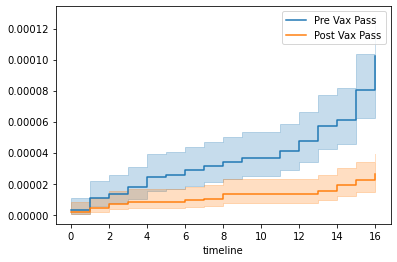

In [148]:
T = new_df['duration']
E = new_df['infected']
groups = new_df['group']
ix = (groups == 'Post Vax Pass')

kmf = KaplanMeierFitter()

kmf.fit(T[~ix], E[~ix], label='Pre Vax Pass')
ax = kmf.plot_cumulative_density()

kmf.fit(T[ix], E[ix], label='Post Vax Pass')
ax = kmf.plot_cumulative_density(ax=ax)

Now this is constructed with a decent amount of estimation, and a very small window of observation, not to mention a number of cofounding variables, so it should be taken with quite a few grains of salt, but at the same time the overall message in this Kaplan-Meier plot would seem to make sense:

- the relative risk reduction for a gym outbreak case is substantial after the introduction of vaccine passports (about 80% after 16 days)

- the ABSOLUTE risk reduction for a gym outbreak case over this timeframe is miniscule - about 0.008%

Probably important to point out that this does not show a causal effect of vaccine *passports* on a reduction in transmission in recreational fitness settings - likely without vaccine passes themselves, but with vaccines, we would see a reduction in outbreaks at recreational fitness settings (and over time as well, as people encounter the virus and develop natural immunity).

#### The question is, without vaccine passports, would we be closer to the blue line or the orange line on the chart above? 

#### To what degree do the vaccines themselves reduce risk of outbreak cases, and to what degree do the vaccine passports reduce the risk of outbreak cases?

As well, in light of the Omicron variant, which does not seem to distinguish between unvaccinated and vaccinated with 2 doses (at least in terms of infection, but not so much when looking at hospitalization outcomes), I would caution anyone from using this Kaplan-Meier plot as a justification for vax passes in recreational fitness settings.